In [1]:
import numpy as np
import matplotlib.pyplot as plt
import platform
import os

from M3RefTracking import M3RefTracking
from DetectorConfigLoader import DetectorConfigLoader
from Detector import Detector
from DreamDetector import DreamDetector
from DreamData import DreamData

from det_classes_test import plot_ray_hits_2d, align_dream, get_residuals, get_efficiency
from detector_characterization import filter_ray_xy

In [2]:
# Check if platform is Windows or Linux
if platform.system() == 'Windows':
    base_dir = 'F:/Saclay/cosmic_data/'
    det_type_info_dir = 'C:/Users/Dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = 'F:/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 100  # Number of files to process at once
elif platform.system() == 'Linux':
    base_dir = '/local/home/dn277127/Bureau/cosmic_data/'
    det_type_info_dir = '/local/home/dn277127/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/local/home/dn277127/Bureau/cosmic_data/Analysis/11-15-24/'
    chunk_size = 7  # Number of files to process at once
else:
    raise OSError('Unknown platform')

run_name = 'ss1_test_1-24-25'
run_dir = f'{base_dir}{run_name}/'
sub_run_name = 'long_run_1'

det_single = 'strip_strip_1'

file_nums = list(range(10, 20))
# file_nums = 'all'

noise_threshold_sigmas = 10

realign_dream = True  # If False, read alignment from file, if True, realign Dream detector

run_json_path = f'{run_dir}run_config.json'
data_dir = f'{run_dir}{sub_run_name}/filtered_root/'
ped_dir = f'{run_dir}{sub_run_name}/decoded_root/'
m3_dir = f'{run_dir}{sub_run_name}/m3_tracking_root/'
alignment_dir = f'{run_dir}alignments/'

z_align_range = [5, 5]  # mm range to search for optimal z position
z_rot_range = [-5, 5]

try:
    os.mkdir(alignment_dir)
except FileExistsError:
    pass
try:
    os.mkdir(out_dir)
except FileExistsError:
    pass

In [3]:
print(f'Getting ray data...')
ray_data = M3RefTracking(m3_dir, single_track=True, file_nums=file_nums)

Getting ray data...


100%|██████████| 57/57 [00:00<00:00, 227.95it/s]


In [4]:
det_config_loader = DetectorConfigLoader(run_json_path, det_type_info_dir)

In [5]:
det_config = det_config_loader.get_det_config(det_single, sub_run_name=sub_run_name)
det = DreamDetector(config=det_config)
det.center[2] = 712
print(f'FEU Num: {det.feu_num}')
print(f'FEU Channels: {det.feu_connectors}')
print(f'HV: {det.hv}')

print(f'Detector center: {det.center}')
print(f'Detector active size: {det.active_size}')

det.load_dream_data(data_dir, ped_dir, noise_threshold_sigmas, file_nums, chunk_size, hist_raw_amps=True, save_waveforms=True)
print(f'Hits shape: {det.dream_data.hits.shape}')

FEU Num: 6
FEU Channels: [1, 2, 3, 4]
HV: {'drift': 800, 'resist_2': 450}
Detector center: [  0   0 712]
Detector active size: [127.4375 127.25     4.    ]
Reading in data...


 14%|█▍        | 1/7 [00:01<00:09,  1.58s/it]

data_raw_i shape: (1375, 256, 32)
data_raw_i shape: (256, 44000)
data_raw_i[0:, 0].shape: (256,)
data_raw_i shape: (1415, 256, 32)
data_raw_i shape: (256, 45280)
data_raw_i[0:, 0].shape: (256,)


 43%|████▎     | 3/7 [00:01<00:01,  2.27it/s]

data_raw_i shape: (1449, 256, 32)
data_raw_i shape: (256, 46368)
data_raw_i[0:, 0].shape: (256,)
data_raw_i shape: (1477, 256, 32)
data_raw_i shape: (256, 47264)
data_raw_i[0:, 0].shape: (256,)
data_raw_i shape: (1470, 256, 32)
data_raw_i shape: (256, 47040)
data_raw_i[0:, 0].shape: (256,)


100%|██████████| 7/7 [00:02<00:00,  3.45it/s]


data_raw_i shape: (1386, 256, 32)
data_raw_i shape: (256, 44352)
data_raw_i[0:, 0].shape: (256,)
data_raw_i shape: (1430, 256, 32)
data_raw_i shape: (256, 45760)
data_raw_i[0:, 0].shape: (256,)
Read in data shape: (10002, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 27.31it/s]


Fitting time: 0.2932600975036621 s
Processed chunk 1/2


100%|██████████| 3/3 [00:01<00:00,  2.16it/s]

data_raw_i shape: (1375, 256, 32)
data_raw_i shape: (256, 44000)
data_raw_i[0:, 0].shape: (256,)
data_raw_i shape: (1442, 256, 32)
data_raw_i shape: (256, 46144)
data_raw_i[0:, 0].shape: (256,)
data_raw_i shape: (1469, 256, 32)
data_raw_i shape: (256, 47008)
data_raw_i[0:, 0].shape: (256,)


Read in data shape: (4286, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 77.05it/s]


Fitting time: 0.14252471923828125 s
Processed chunk 2/2
Getting hits...
Hits shape: (14288, 256)


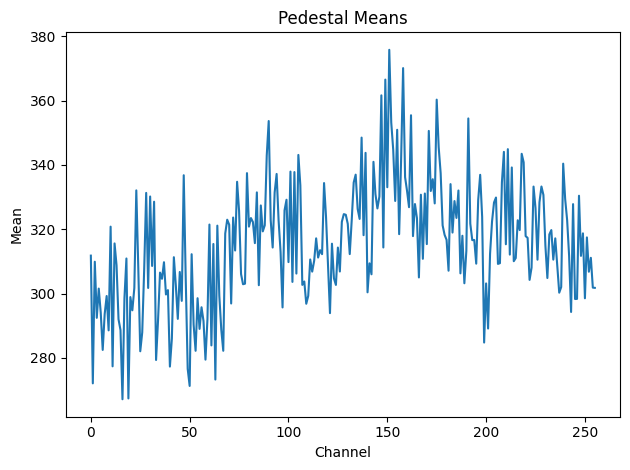

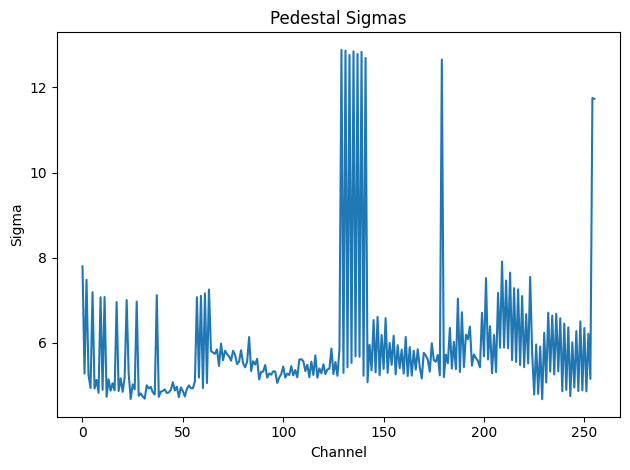

In [6]:
det.dream_data.plot_pedestals()

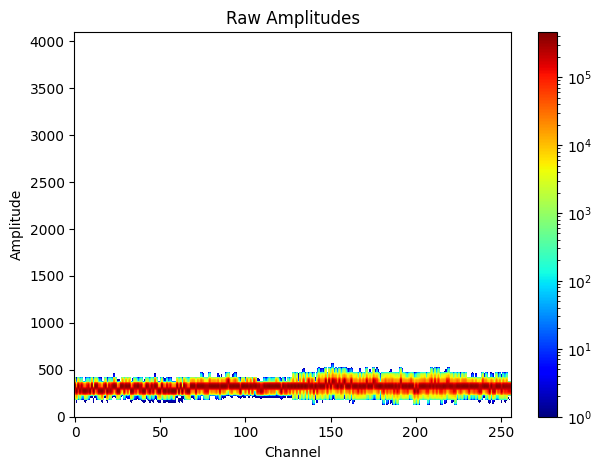

In [7]:
det.dream_data.plot_raw_amps_2d_hist()

KeyboardInterrupt: 

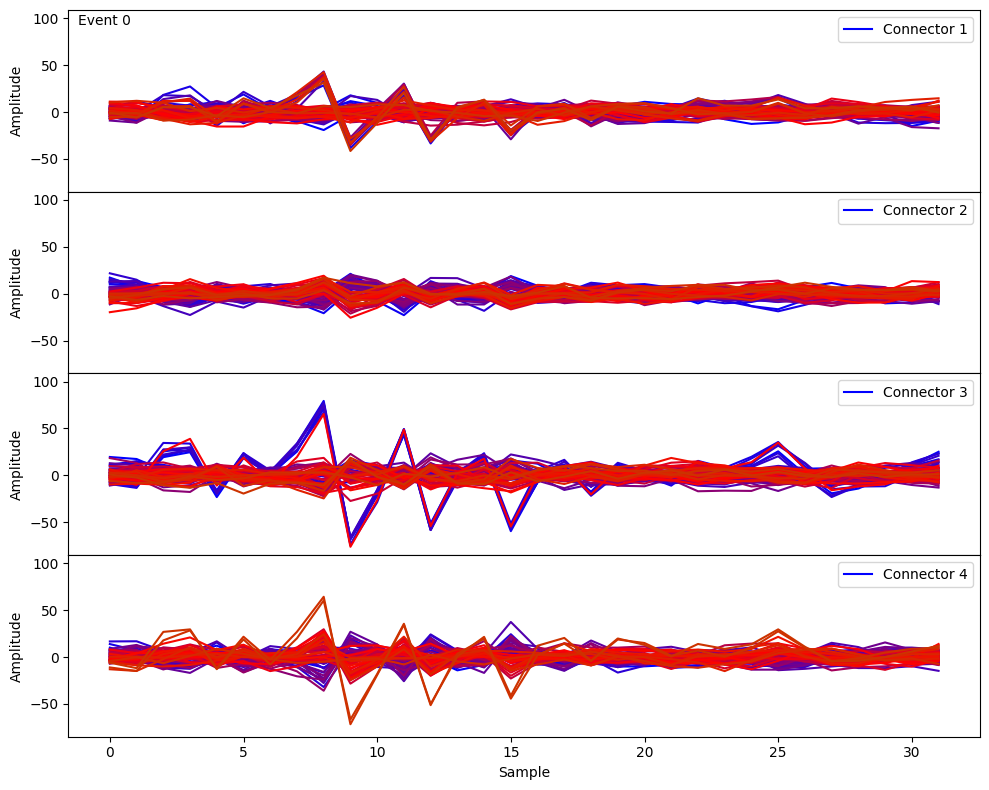

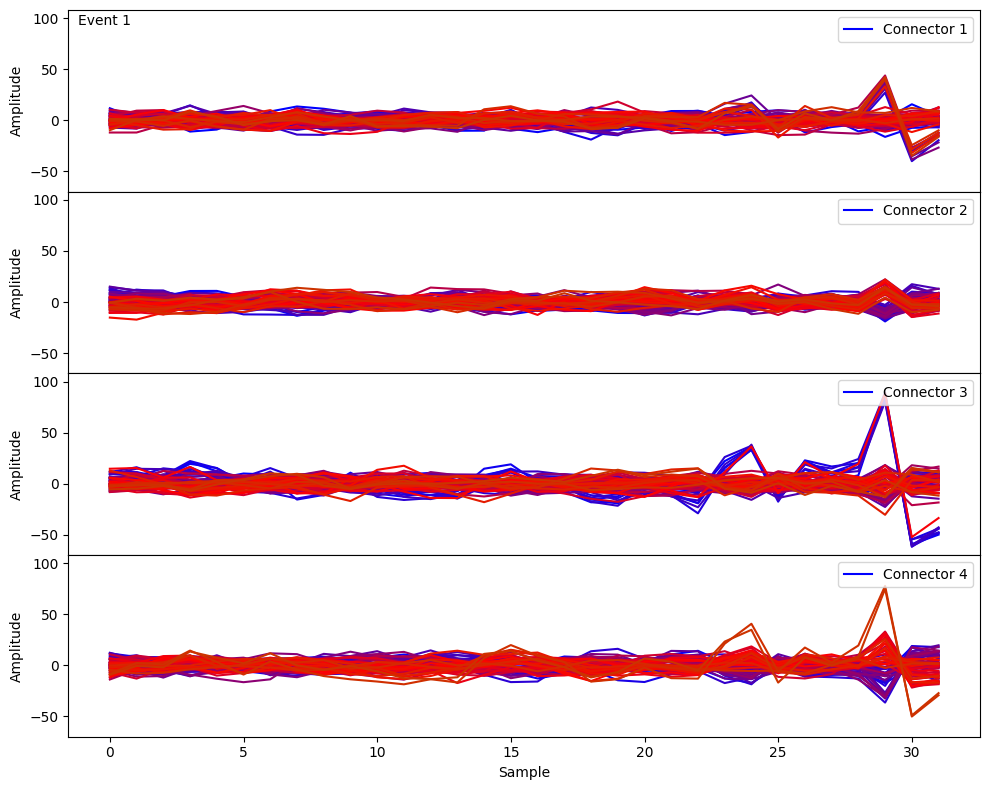

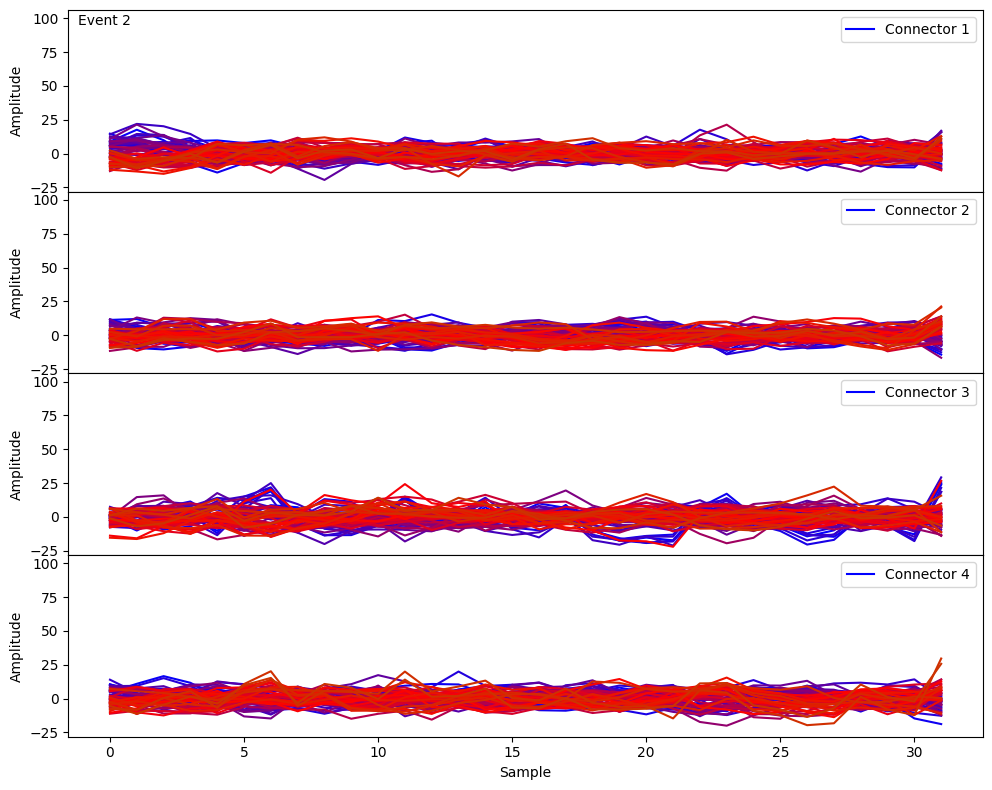

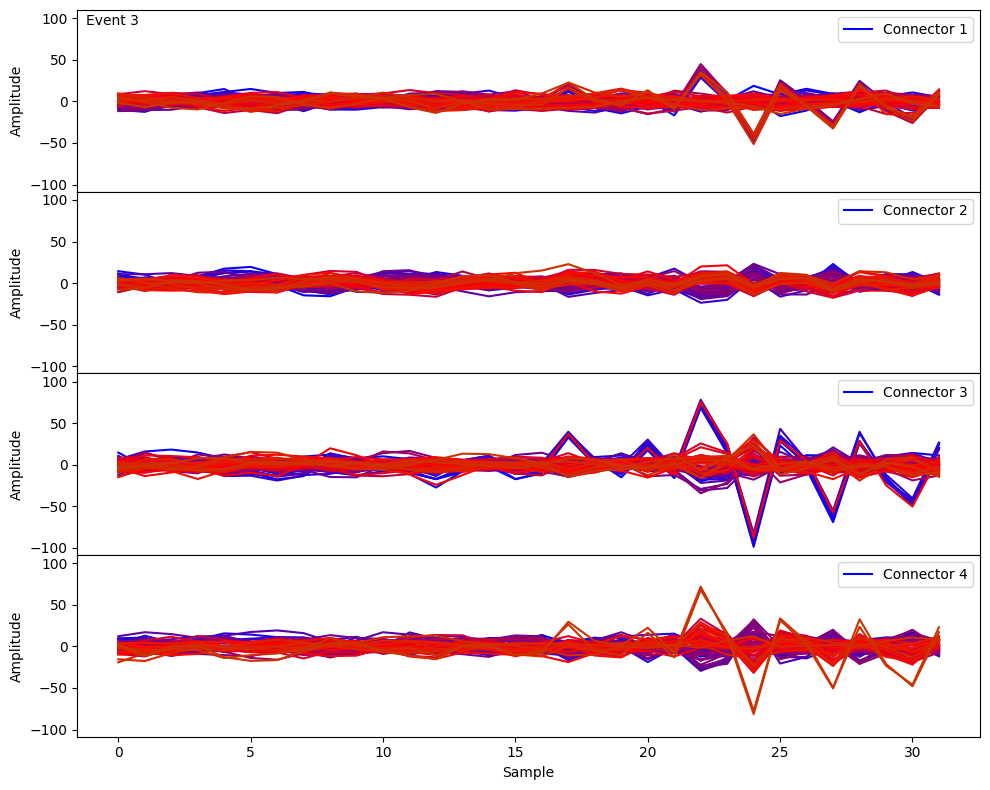

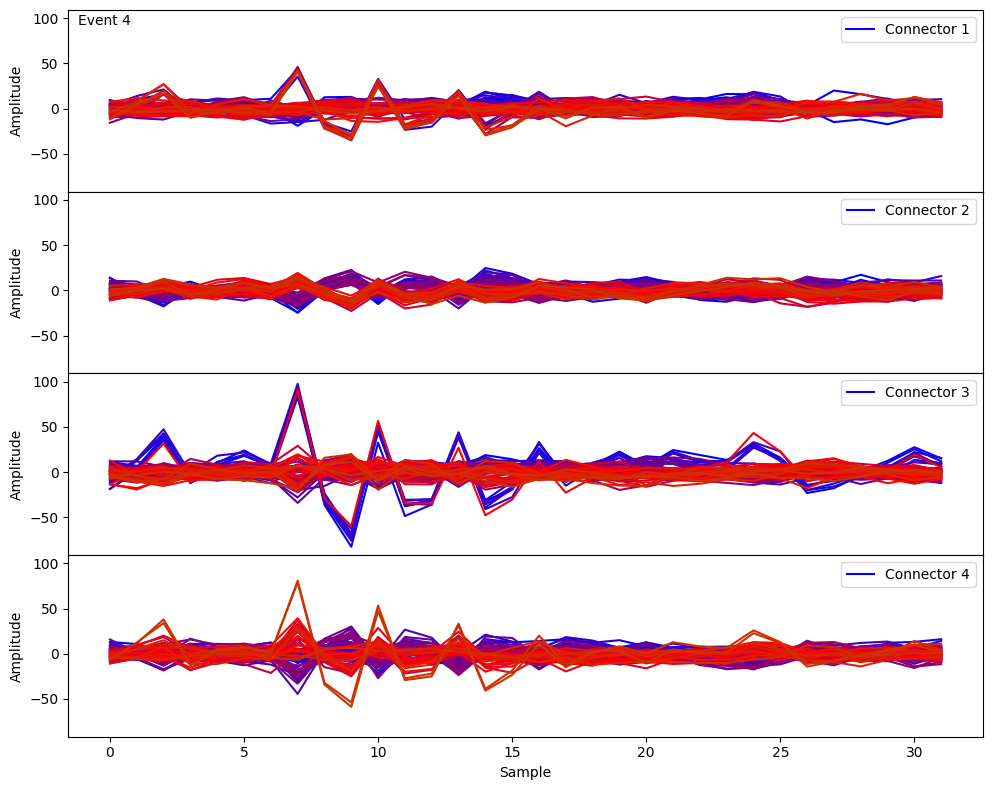

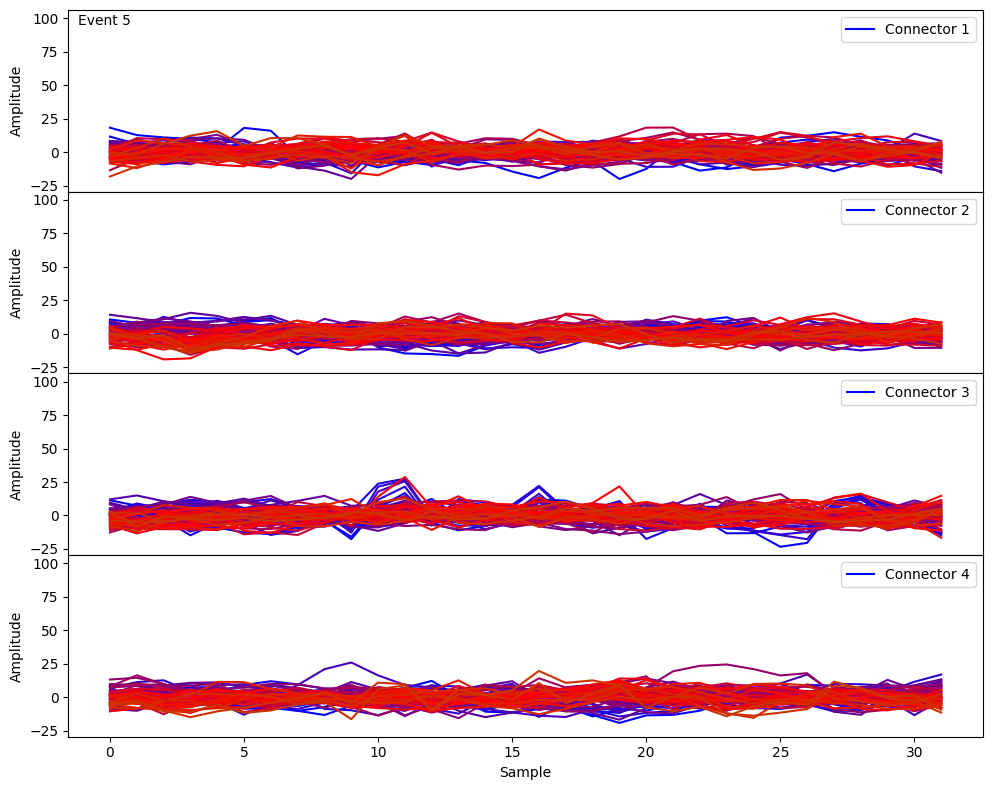

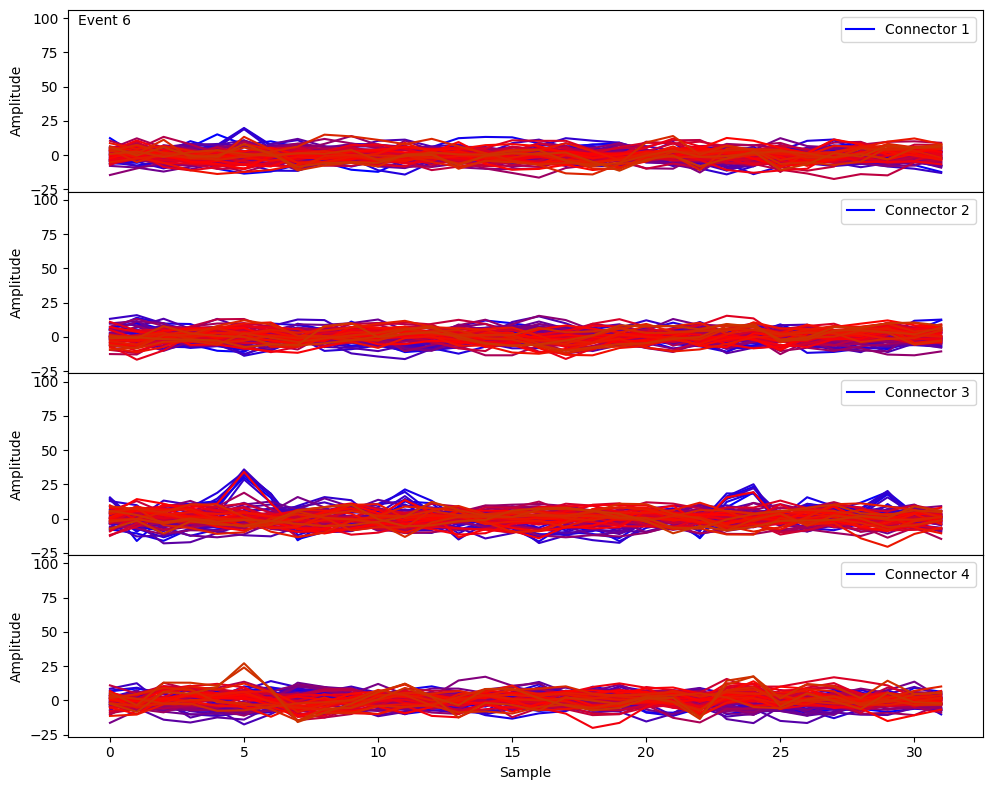

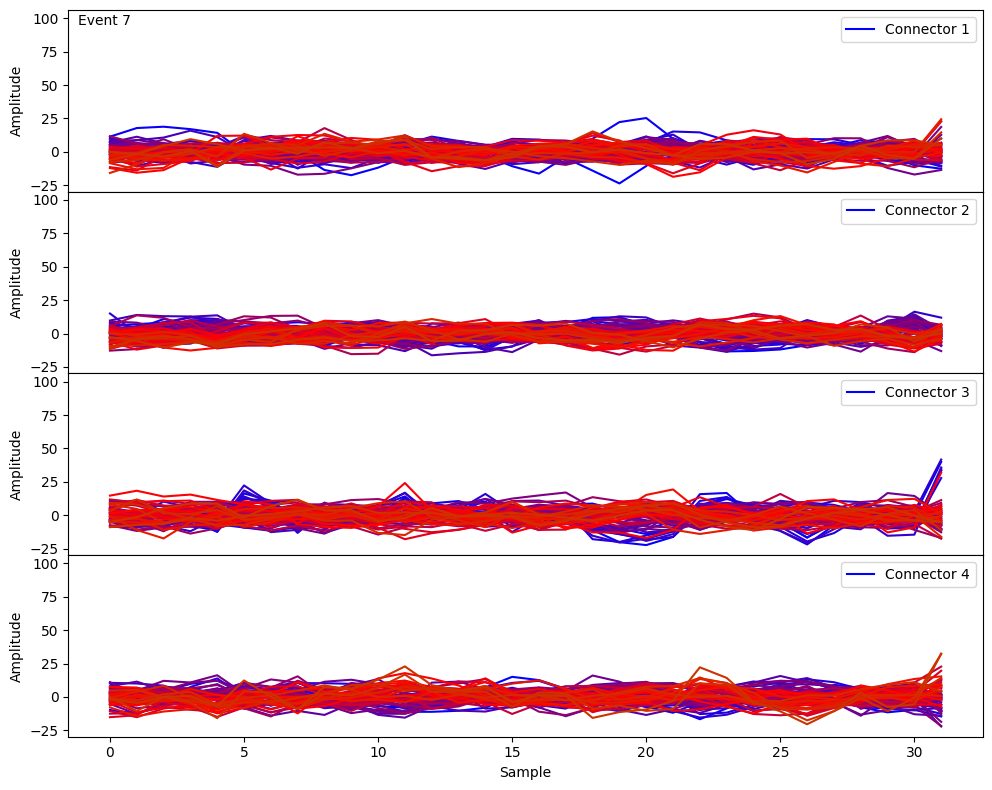

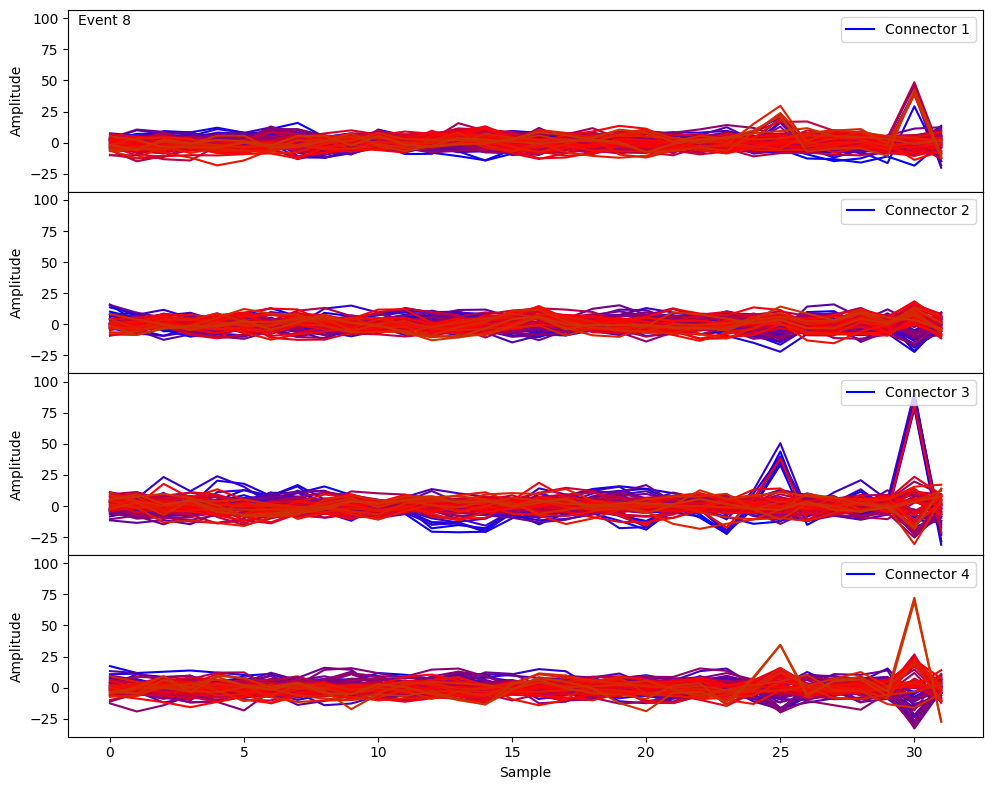

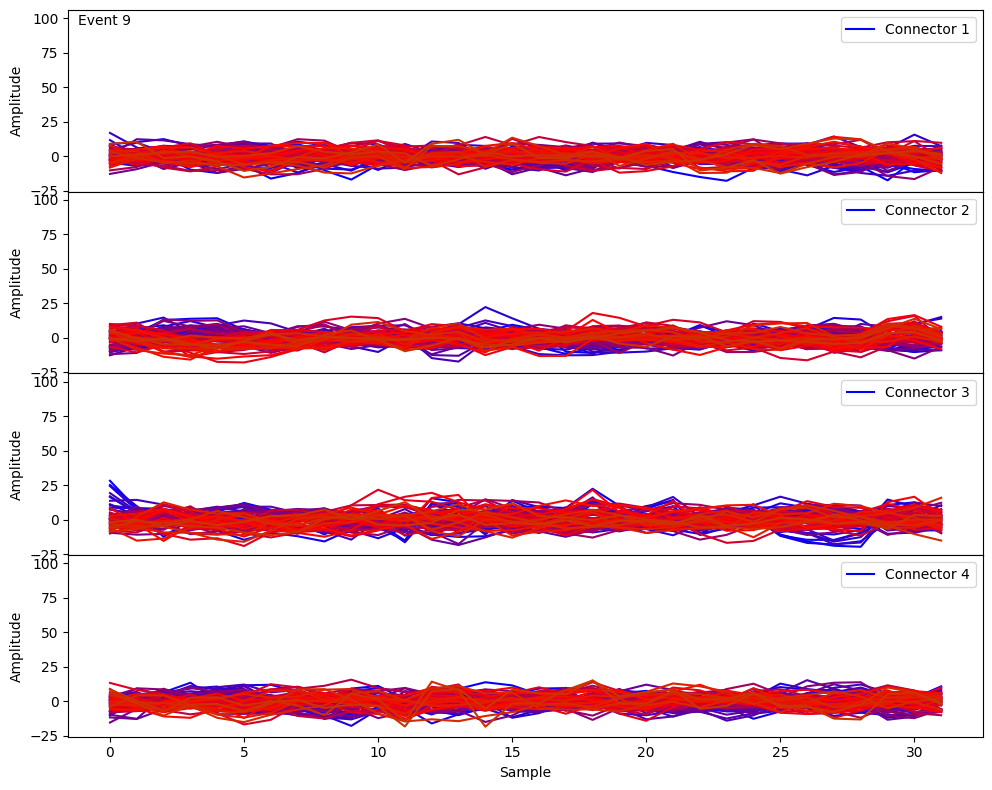

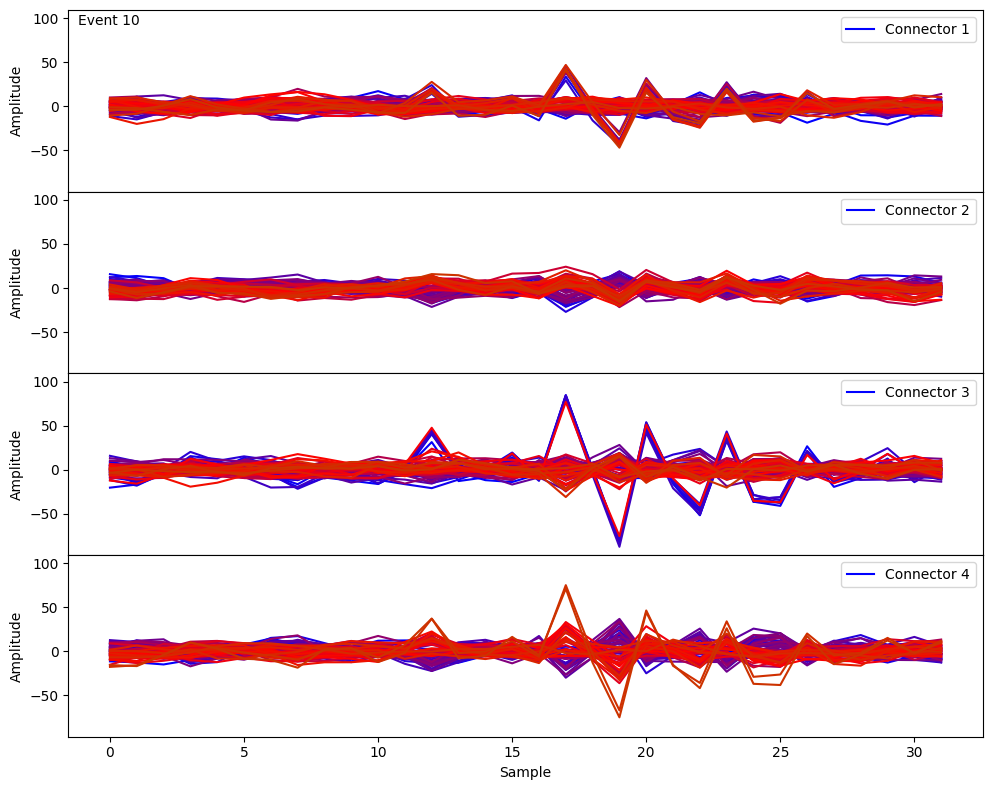

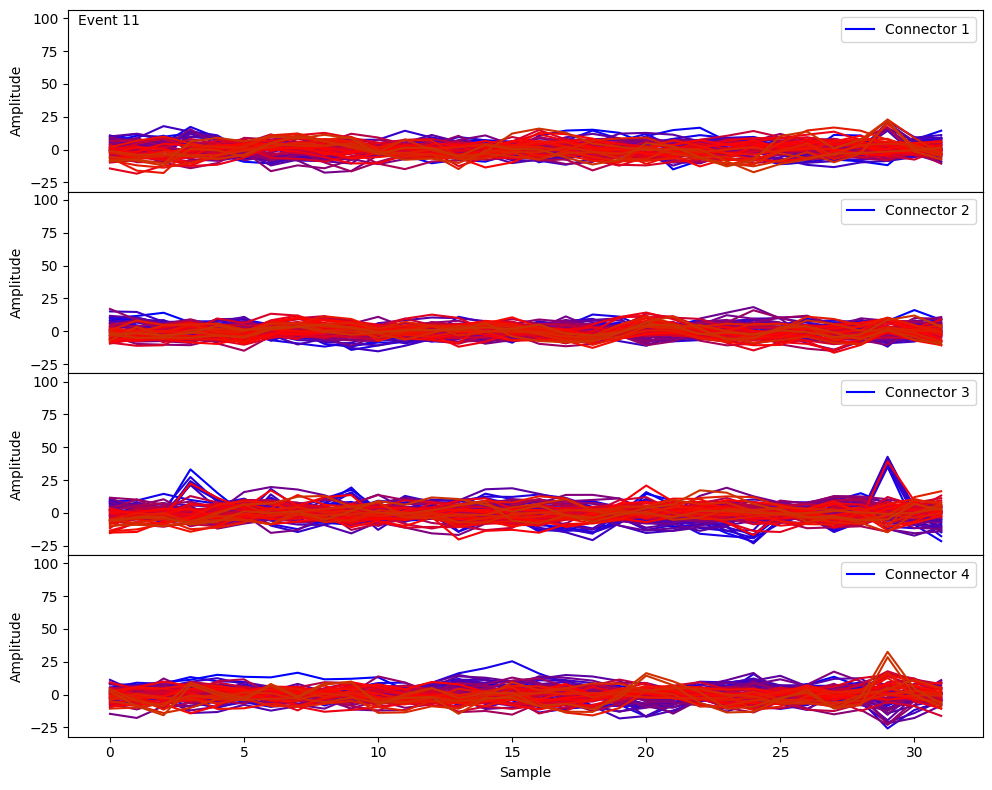

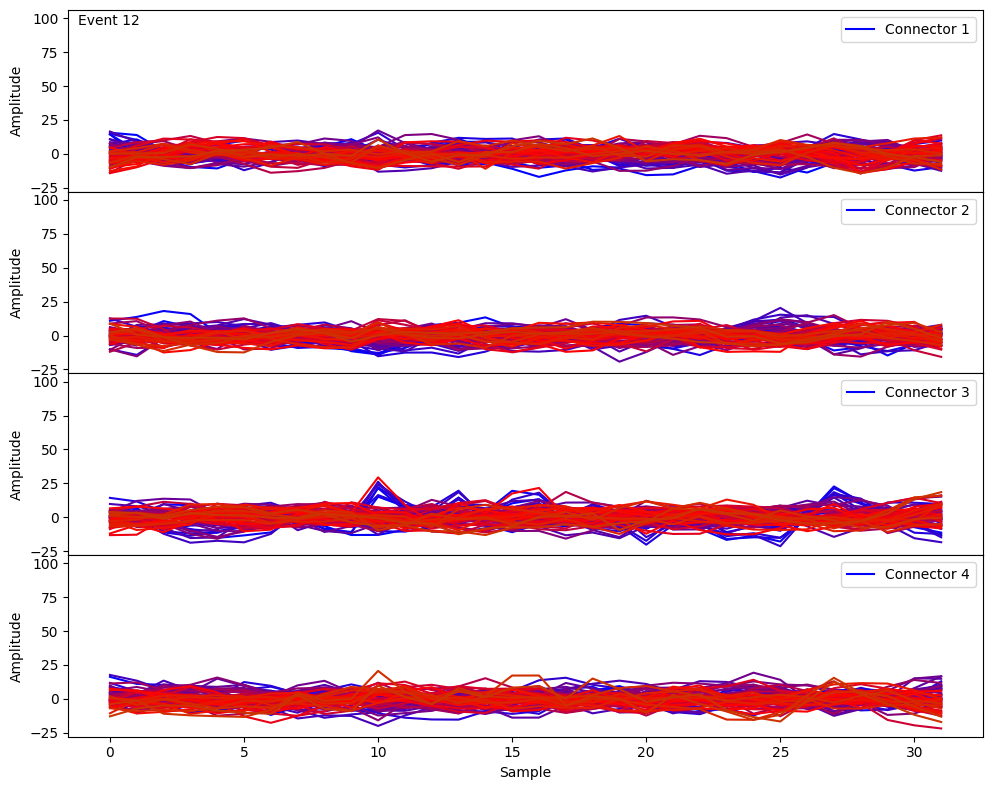

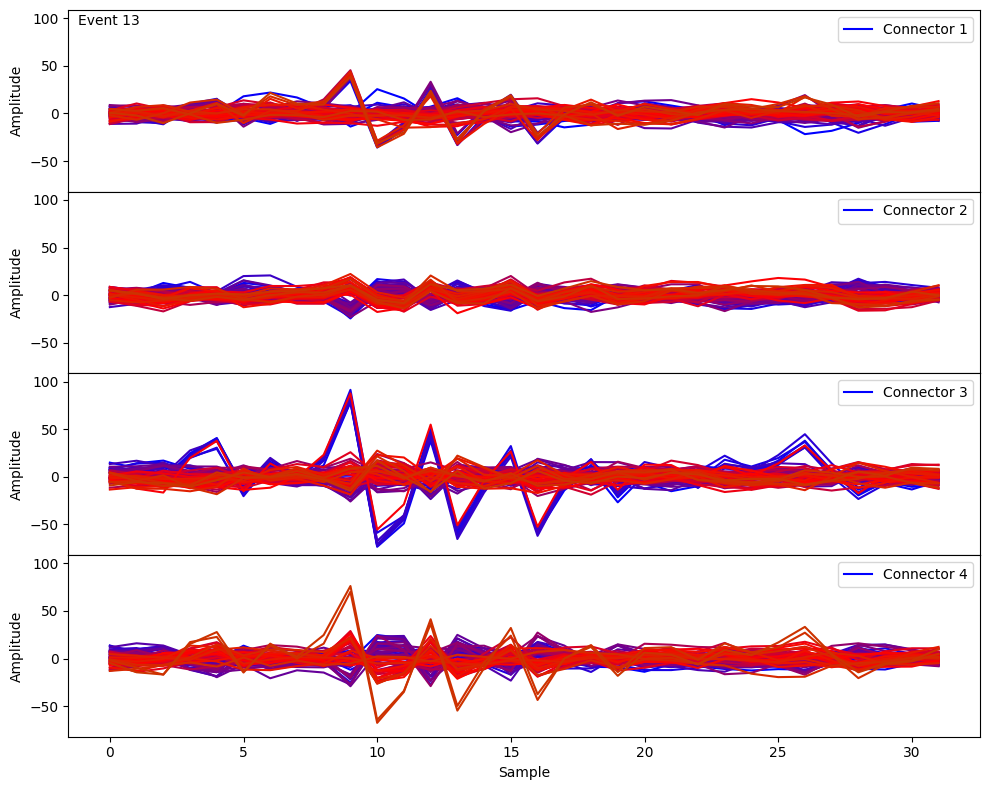

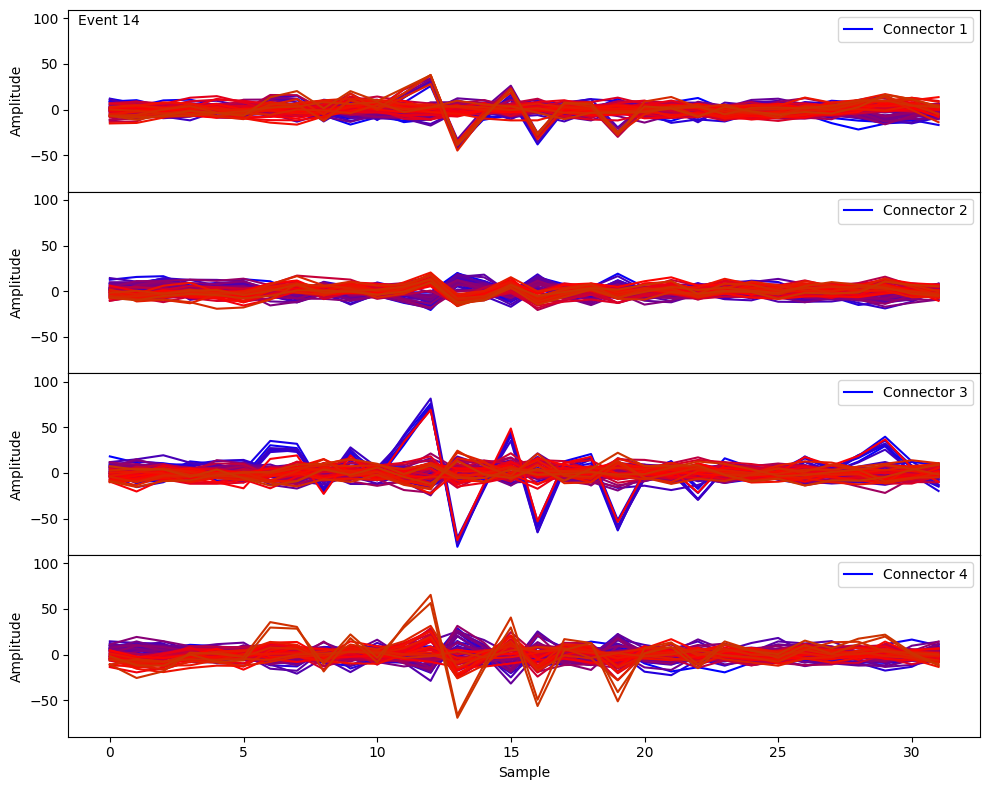

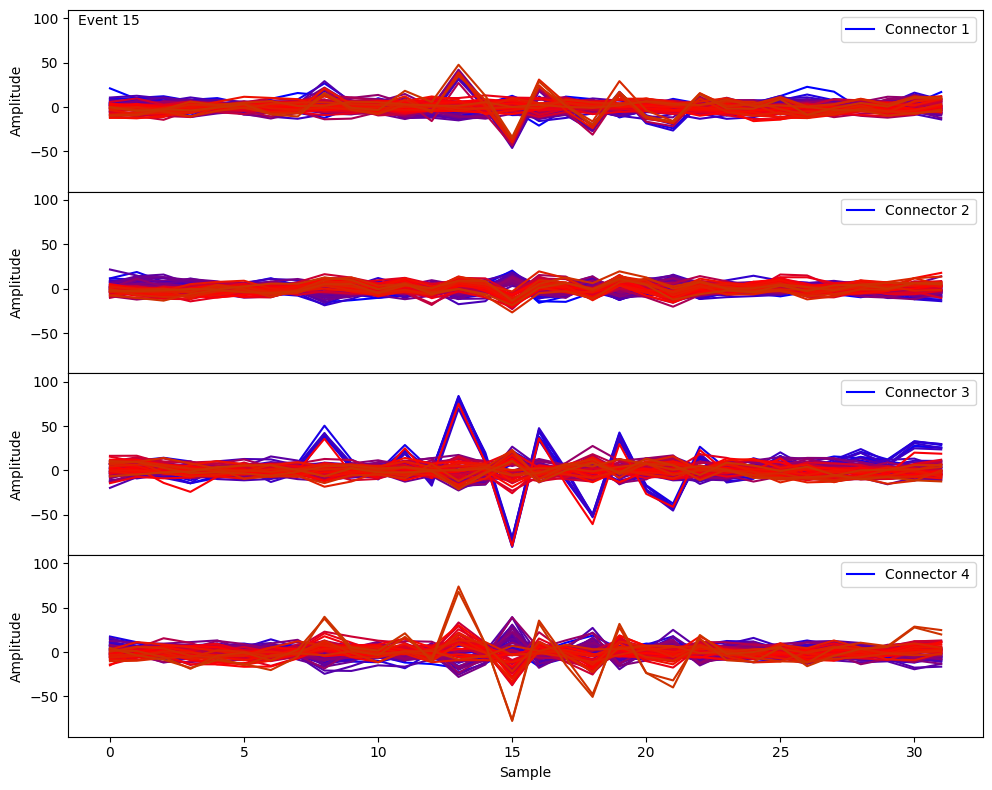

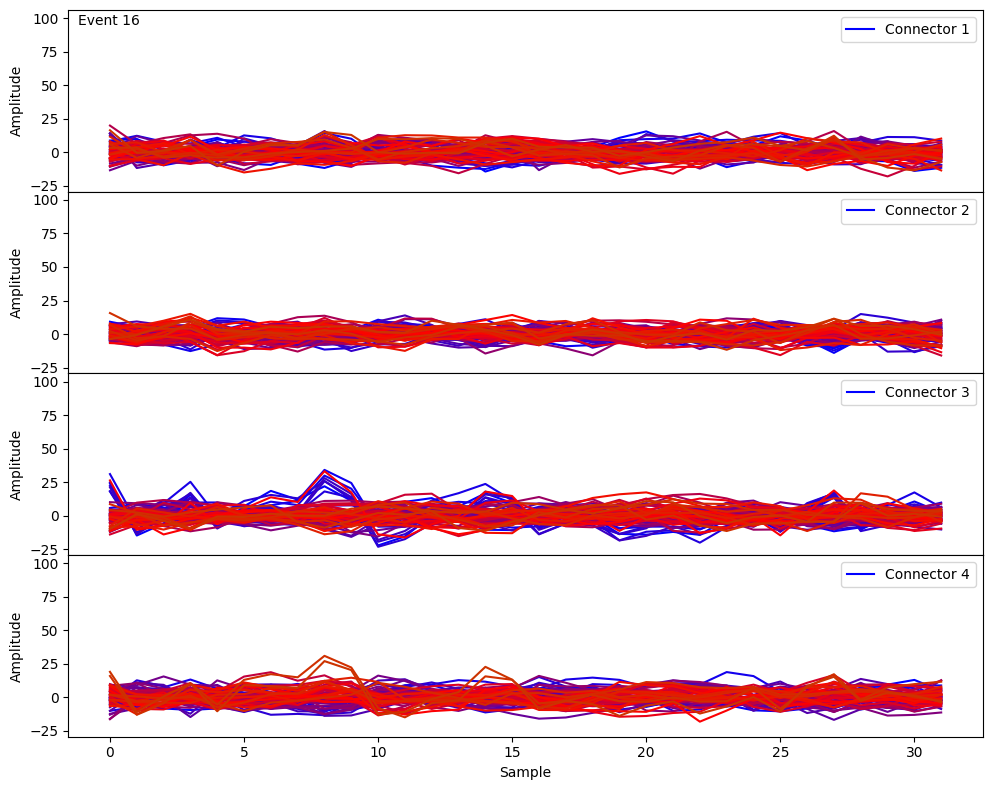

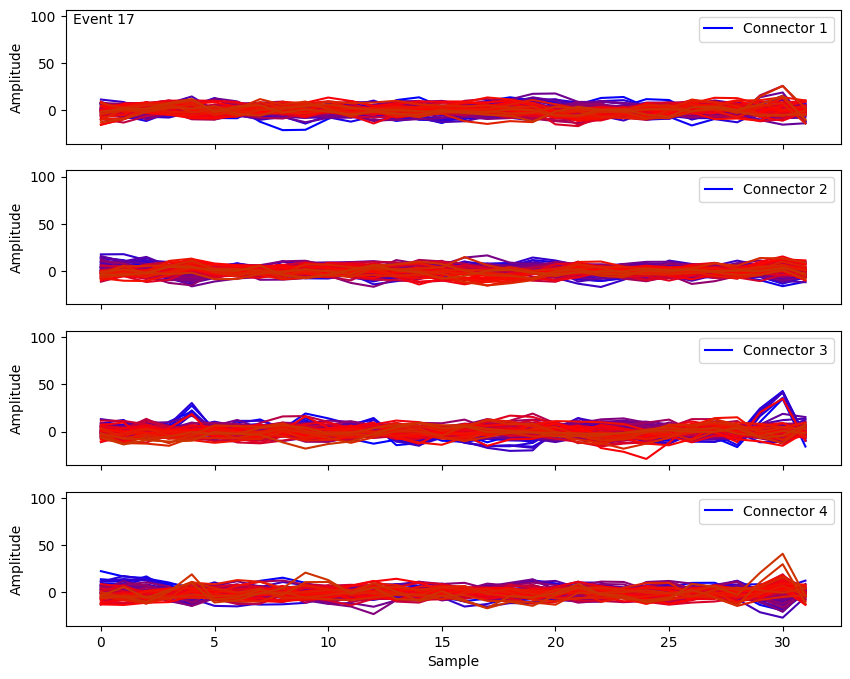

In [8]:
for event_num in range(min(len(det.dream_data.hits), 20)):
    # det.plot_event_1d(event_num)
    # det.plot_event_2d(event_num)
    det.dream_data.plot_waveforms(event_num)

In [ ]:
# det.dream_data.plot_noise_metric()

In [ ]:
det.dream_data.plot_hits_vs_strip(print_dead_strips=True)

In [ ]:
det.dream_data.plot_amplitudes_vs_strip()

In [ ]:
det.make_sub_detectors()
event_nums = det.plot_xy_amp_sum_vs_event_num(True, 500, False, 15)

# if realign_dream:
#     det.add_rotation(90, 'z')

In [ ]:
plot_ray_hits_2d(det, ray_data)
print(f'Detector center: {det.center}')
print(f'Detector rotations: {det.rotations}')

In [ ]:
det.plot_hits_1d()

In [ ]:
print(len(det.dream_data.hits))

In [ ]:
for event_num in range(min(len(det.dream_data.hits), 2)):
    det.plot_event_1d(event_num)
    det.plot_event_2d(event_num)
    det.dream_data.plot_waveforms(event_num)

In [ ]:
# z_orig = det.center[2]
# x_bnds = det.center[0] - det.size[0] / 2, det.center[0] + det.size[0] / 2
# y_bnds = det.center[1] - det.size[1] / 2, det.center[1] + det.size[1] / 2
# ray_traversing_triggers = ray_data.get_traversing_triggers(z_orig, x_bnds, y_bnds, expansion_factor=0.1)

alignment_file = f'{alignment_dir}{det.name}_alignment.txt'
if realign_dream:
    # det.add_rotation(-90, 'z')
    align_dream(det, ray_data, z_align_range, z_rot_range)
    det.write_det_alignment_to_file(alignment_file)
else:
    det.read_det_alignment_from_file(alignment_file)

In [ ]:
if realign_dream:
    # det.add_rotation(-90, 'z')
    align_dream(det, ray_data, z_align_range, z_rot_range)
    det.write_det_alignment_to_file(alignment_file)
else:
    det.read_det_alignment_from_file(alignment_file)

In [ ]:
plot_ray_hits_2d(det, ray_data)
print(f'Detector center: {det.center}')
print(f'Detector rotations: {det.rotations}')

In [ ]:
get_efficiency(det, ray_data, plot=True, in_det=True, tolerance=0.2)

In [ ]:
get_residuals(det, ray_data, plot=True, in_det=True, tolerance=0.2)

New stuff above